In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cvp
import CSSS as CSSS

%matplotlib inline

In [2]:
## Create an example case where we separate two signals based on sin functions. 
N = 100

X1 = np.sin(np.arange(N)*2*np.pi/N)*3
Y1 = X1 + np.random.normal(0,.5,N) + 10


X2 = np.cos(np.arange(N)*2*np.pi/N)*3
Y2 = X2 + np.random.normal(0,1,N)

Y = Y1 + Y2


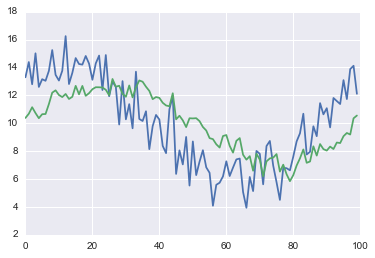

In [3]:
plt.plot(Y1 + Y2)
plt.plot(Y1)

In [4]:
# Try it out. 
CSSEtry = CSSS.CSSS(Y)  ## Instantiate model with aggregate signal, Y
CSSEtry.addSource(np.vstack((np.ones((1,N)),X1)).transpose(), alpha = 4, name = 'Y1',
                 regularizeSource='diff1_sse', gamma = 10000,
                 regularizeTheta='L1', beta=0)  ## Add a model for Y1
CSSEtry.addSource(X2, alpha = 1, name = 'Y2') ## Add a model for Y2

## Constrain Y2 to be greater than -1 just to try out the constraints. 
CSSEtry.addConstraint(CSSEtry.models['Y2']['source'] > -10 )

CSSEtry.constructSolve()

    


Setting theta reg cost to 0


In [5]:
np.array([1,2,3]).size

3

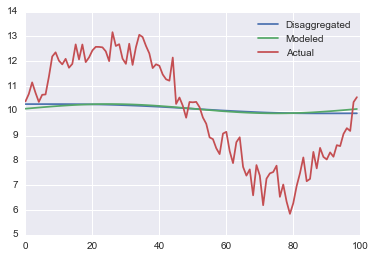

In [6]:
plt.plot(CSSEtry.models['Y1']['source'].value, label = 'Disaggregated')
plt.plot(CSSEtry.models['Y1']['regressor'] * CSSEtry.models['Y1']['theta'].value, label = 'Modeled')
plt.plot(Y1, label = 'Actual')
plt.legend()
plt.show()

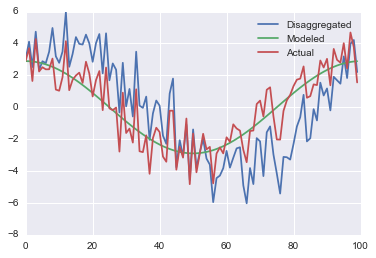

In [7]:
plt.plot(CSSEtry.models['Y2']['source'].value, label = 'Disaggregated')
plt.plot(CSSEtry.models['Y2']['regressor'] * CSSEtry.models['Y2']['theta'].value, label = 'Modeled')
plt.plot(Y2, label = 'Actual')
plt.legend()
plt.show()

In [8]:
def doit(x):
    np.sum(x)
callable(doit)

True